<a href="https://colab.research.google.com/github/superbunny38/DataScience/blob/main/Probability%26Statistics/4Summer_TwoVariablesRelationship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

appendix: critical value for pearson correlation coefficient

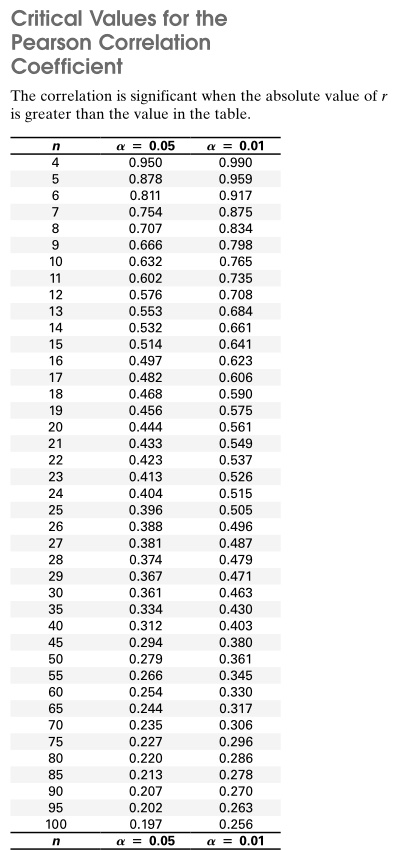

## Scatter Diagrams

In [1]:
x = [35,50,75,95,120,130,145,155,160,175,185,190]
y = [5.88,5.99,6.74,6.1,7.47,6.93,6.42,7.97,7.92,7.62,6.89,7.9]
assert len(x) == len(y)

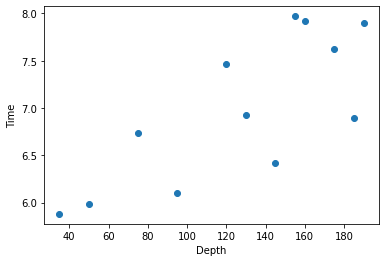

In [3]:
plt.scatter(x,y)
plt.ylabel("Time")
plt.xlabel("Depth")
plt.show()

## Properties of the Linear Correlation Coefficient

$\rho$: population correlation coefficient<br>
$r$: sample correlation coefficient

$r = \frac{\sum(\frac{x_i-\bar{x}}{s_x})(\frac{y_i-\bar{y}}{s_y})}{n-1}$

-1<=$r$<=1

In [14]:
x

[35, 50, 75, 95, 120, 130, 145, 155, 160, 175, 185, 190]

In [15]:
y

[5.88, 5.99, 6.74, 6.1, 7.47, 6.93, 6.42, 7.97, 7.92, 7.62, 6.89, 7.9]

In [26]:
def sample_std(data):
  mean = np.mean(data)
  n = len(data)
  numer = np.sum((data-mean)**2)
  denom = n-1
  print(np.sqrt(numer/denom))
  return np.sqrt(numer/denom)

In [4]:
def linear_r(var1,var2):#linear correlation coefficient
  assert len(var1) == len(var2)
  n = len(var1)
  x_mean = np.mean(var1)
  x_std = sample_std(var1)
  y_mean = np.mean(var2)
  y_std = sample_std(var2)
  
  print(f"mean, std of var1: {x_mean}, {x_std}")
  print(f"mean, std of var2: {y_mean}, {y_std}")
  numer = (1/x_std)*(1/y_std)*sum((var1-x_mean)*(var2-y_mean))
  denom = n-1
  print("numerator for r:",numer,"denomominator for r:",denom)
  r = numer/denom
  return r

In [30]:
print(linear_r(x,y))

52.22873643015796
0.780774188439483
mean, std of var1: 126.25, 52.22873643015796
mean, std of var2: 6.985833333333335, 0.780774188439483
numer: 8.501036835398208 denom: 11
0.7728215304907462


whether a Linear Relation Exists 
between Two Variables


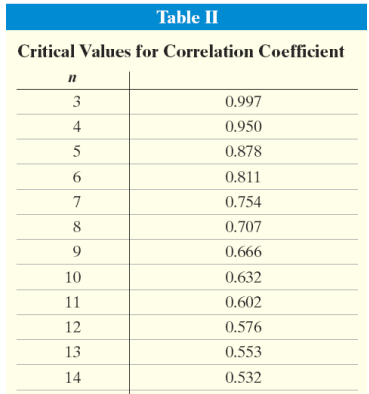

Since 
0.773 > 0.576, there is a positive 
linear relation

# Lurking Variables

whether cola 
consumption is associated with lower 
bone mineral density in women.

In [31]:
Number = [0,0,1,1,2,2,3,3,4,5,5,6,7,7,8]
Density = [0.893,0.882,0.891,0.881,0.888,0.871,0.868,0.876,0.873,0.875,0.871,0.867,0.862,0.872,0.865]

In [33]:
assert len(Number) == len(Density) == 15

In [34]:
linear_r(Number,Density)

2.640346297633811
0.00946924847422787
mean, std of var1: 3.6, 2.640346297633811
mean, std of var2: 0.8756666666666668, 0.00946924847422787
numer: -11.279054747401524 denom: 14


-0.8056467676715374

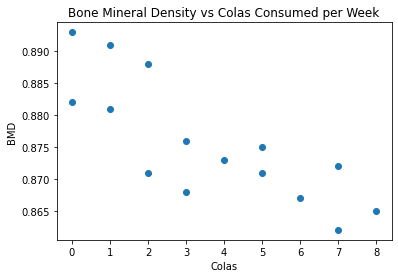

In [36]:
plt.scatter(Number,Density)
plt.title("Bone Mineral Density vs Colas Consumed per Week")
plt.xlabel("Colas")
plt.ylabel("BMD")
plt.show()

# The Least-Squares Regression Line


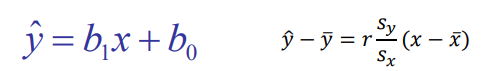

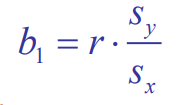

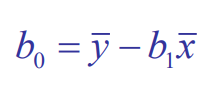

In [52]:
#b_1
r = linear_r(Number,Density)
sample_std_y = sample_std(Density)
sample_std_x = sample_std(Number)
b_1 = r*sample_std_y/sample_std_x
print("b_1:",b_1)

2.640346297633811
0.00946924847422787
mean, std of var1: 3.6, 2.640346297633811
mean, std of var2: 0.8756666666666668, 0.00946924847422787
numer: -11.279054747401524 denom: 14
0.00946924847422787
2.640346297633811
b_1: -0.0028893442622950844


In [53]:
#b_0
b_0 = np.mean(Density) - b_1*np.mean(Number)

In [5]:
def Calculate_bs(x,y):
  Number = x
  Density = y
  #b_1
  r = linear_r(Number,Density)
  sample_std_y = sample_std(Density)
  sample_std_x = sample_std(Number)
  b_1 = r*sample_std_y/sample_std_x
  #b_0
  b_0 = np.mean(Density) - b_1*np.mean(Number)
  print("\n\n\n\n")
  print("b_1:",b_1, "b_0:",b_0)
  return b_1,b_0

In [55]:
Calculate_bs(Number,Density)

2.640346297633811
0.00946924847422787
mean, std of var1: 3.6, 2.640346297633811
mean, std of var2: 0.8756666666666668, 0.00946924847422787
numer: -11.279054747401524 denom: 14
0.00946924847422787
2.640346297633811





b_1: -0.0028893442622950844 b_0: 0.8860683060109291


(-0.0028893442622950844, 0.8860683060109291)

In [42]:
def lsr_line(x,y):
  
  # assemble matrix A
  A = np.vstack([x, np.ones(len(x))]).T

  # turn y into a column vector
  #y = y[:, np.newaxis]
  alpha = np.linalg.lstsq(A, y, rcond=None)[0]
  #print(alpha)
  return alpha

In [43]:
lsr_line(Number,Density)

array([-0.00288934,  0.88606831])

In [44]:
slope, intercept = np.polyfit(Number, Density, 1)

In [45]:
print(slope, intercept)

-0.0028893442622950896 0.8860683060109287


In [71]:
def draw_lsr(x,y):
  Number,Density = x,y
  plt.scatter(Number,Density)
  slope,intercept =  np.polyfit(Number, Density, 1)
  x = [np.float64(n) for n in Number]
  y = [x*slope+intercept for x in x]
  plt.plot(x, y, 'r')
  plt.show()

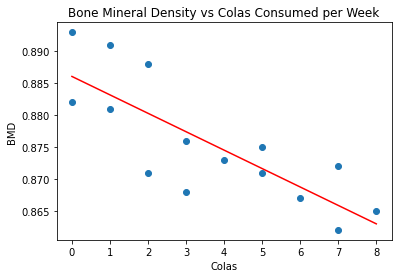

In [50]:
plt.scatter(Number,Density)
plt.title("Bone Mineral Density vs Colas Consumed per Week")
x = [np.float64(n) for n in Number]
y = [x*slope+intercept for x in x]
plt.plot(x, y, 'r')
plt.xlabel("Colas")
plt.ylabel("BMD")
plt.show()

(a)Find the least-squares 
regression line.


In [58]:
Depth = [35,50,75,95,120,130,145,155,160,175,185,190]#x
Time = [5.88,5.99,6.74,6.1,7.47,6.93,6.42,7.97,7.92,7.62,6.89,7.9]#y
assert len(Depth) == len(Time)

In [64]:
linear_r(Depth,Time)

52.22873643015796
0.780774188439483
mean, std of var1: 126.25, 52.22873643015796
mean, std of var2: 6.985833333333335, 0.780774188439483
numer: 8.501036835398208 denom: 11


0.7728215304907462

In [61]:
lsr_line(Depth,Time)

array([0.01155301, 5.52726585])

In [59]:
b_1,b_0 = Calculate_bs(Depth,Time)

52.22873643015796
0.780774188439483
mean, std of var1: 126.25, 52.22873643015796
mean, std of var2: 6.985833333333335, 0.780774188439483
numer: 8.501036835398208 denom: 11
0.780774188439483
52.22873643015796





b_1: 0.011553009789627158 b_0: 5.527265847392906


In [60]:
print(f"Predicted_Time = Density * {b_1} + {b_0}")

Predicted_Time = Density * 0.011553009789627158 + 5.527265847392906


(b)Predict the drilling time if 
drilling starts at 130 feet.

In [62]:
b_1*130+b_0

7.029157120044436

(c)Is the observed drilling 
time at 130 feet above, or 
below, average.

In [63]:
6.93<b_1*130+b_0#below average

True

(d)Draw the least-squares 
regression line on the 
scatter diagram of the 
data.

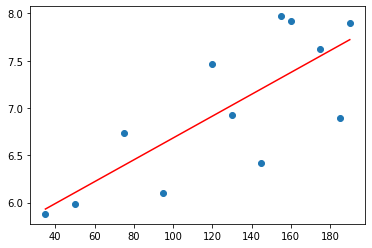

In [72]:
draw_lsr(Depth,Time)

## Compute and Interpret the Coefficient of Determination

$R^2$: coefficient of determination

=> the proportion of total variation in 
the response variable that is explained by the 
least-squares regression line

0 <= $R^2$ <= 1

- $R^2$ = 0: the line has no explanatory value
- $R^2$ = 1: the line explains 100% of the 
variation in the response variable. 


In [74]:
print("=======Depth========")
print("mean:",np.mean(Depth))
print("std:",sample_std(Depth))
print("=======Time========")
print("mean:",np.mean(Time))
print("std:",sample_std(Time))
print("\n\nCorrelation:",linear_r(Depth,Time))

=======Depth========
mean: 126.25
52.22873643015796
std: 52.22873643015796
=======Time========
mean: 6.985833333333335
0.780774188439483
std: 0.780774188439483
52.22873643015796
0.780774188439483
mean, std of var1: 126.25, 52.22873643015796
mean, std of var2: 6.985833333333335, 0.780774188439483
numer: 8.501036835398208 denom: 11


Correlation: 0.7728215304907462


In [76]:
b_1,b_0 = Calculate_bs(Depth,Time)

52.22873643015796
0.780774188439483
mean, std of var1: 126.25, 52.22873643015796
mean, std of var2: 6.985833333333335, 0.780774188439483
numer: 8.501036835398208 denom: 11
0.780774188439483
52.22873643015796





b_1: 0.011553009789627158 b_0: 5.527265847392906


Time = b_1*Depth + b_0

In [77]:
print(f"Time = {b_1}*Depth + {b_0}")

Time = 0.011553009789627158*Depth + 5.527265847392906


Suppose we were asked to predict the time to 
drill an additional 5 feet, but we did not 
know the current depth of the drill. What 
would be our best “guess”?

In [83]:
np.mean(Time)#mean for Time to drill 5 feet

6.985833333333335

Now suppose that we are asked to predict the 
time to drill an additional 5 feet if the current 
depth of the drill is 160 feet?

In [85]:
b_1*160+b_0

7.375747413733251

Total deviation  = $y-\bar{y}$
<br>
Explained deviation = $\hat{y}-\bar{y}$
<br>
Unexplained deviation = $y-\hat{y}$

<br>
Total = Explained + Unexplained

<br>
Total Variance = Explained Variace + Unexplained Variance

<br>
$R^2$ = $\frac{Explained V}{Total V}$ = $1-\frac{Unexplained V}{Total V}$

In [102]:
def R2(x,y):
  coeff = linear_r(x,y)
  return coeff**2

In [89]:
coeff = linear_r(Depth,Time)
coeff

52.22873643015796
0.780774188439483
mean, std of var1: 126.25, 52.22873643015796
mean, std of var2: 6.985833333333335, 0.780774188439483
numer: 8.501036835398208 denom: 11


0.7728215304907462

In [90]:
R2 = coeff**2
R2

0.5972531179900593

 59.75% of the variability in drilling time is 
explained by the least-squares regression line.

In [91]:
data = [[3.6, 8.9, 3.1, 8.9, 2.8, 8.9],
[8.3, 15.0, 9.4, 15.0, 8.1, 15.0],
[0.5, 4.8, 1.2, 4.8, 3.0, 4.8],
[1.4, 6.0, 1.0, 6.0, 8.3, 6.0],
[8.2, 14.9, 9.0, 14.9, 8.2, 14.9],
[5.9, 11.9, 5.0, 11.9, 1.4, 11.9],
[4.3, 9.8, 3.4, 9.8, 1.0, 9.8],
[8.3, 15.0, 7.4, 15.0, 7.9, 15.0],
[0.3, 4.7, 0.1, 4.7, 5.9, 4.7],
[6.8, 13.0, 7.5, 13.0, 5.0, 13.0]]

In [93]:
Ax,Ay,Bx,By,Cx,Cy = [],[],[],[],[],[]
for d in data:
  Ax.append(d[0])
  Ay.append(d[1])
  Bx.append(d[2])
  By.append(d[3])
  Cx.append(d[4])
  Cy.append(d[5])

In [94]:
DsetA = pd.DataFrame({'x':Ax, 'y':Ay})
DsetB = pd.DataFrame({'x':Bx, 'y':By})
DsetC = pd.DataFrame({'x':Cx, 'y':Cy})

In [97]:
sample_std(DsetA['y'])**2 == sample_std(DsetB['y'])**2 == sample_std(DsetC['y'])**2#For each data set, the variance of y is 17.49. 


4.181971890016586
4.181971890016586
4.181971890016586


True

Draw a scatter diagram for each of these data 
sets.

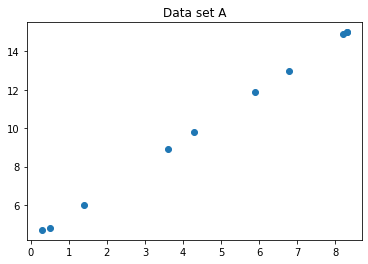

In [99]:
plt.title("Data set A")
plt.scatter(DsetA['x'],DsetA['y'])
plt.show()

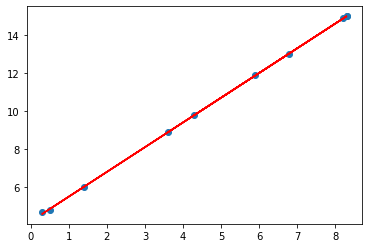

In [104]:
draw_lsr(DsetA['x'],DsetA['y'])

In [107]:
print("R2: ",R2(DsetA['x'],DsetA['y']))

3.218764428230877
4.181971890016586
mean, std of var1: 4.76, 3.218764428230877
mean, std of var2: 10.4, 4.181971890016586
numer: 8.999476907446128 denom: 9
R2:  0.9998837605883474


99.99% of the variability in y is explained by 
the least-squares regression line


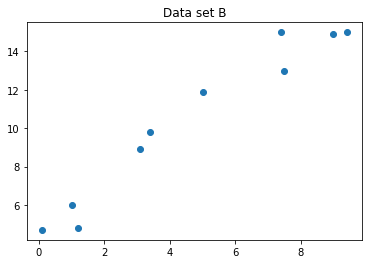

In [100]:
plt.title("Data set B")
plt.scatter(DsetB['x'],DsetB['y'])
plt.show()

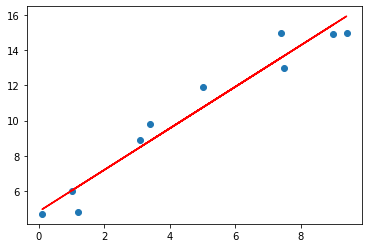

In [108]:
draw_lsr(DsetB['x'],DsetB['y'])

In [109]:
print("R2: ",R2(DsetB['x'],DsetB['y']))

3.4504267046909494
4.181971890016586
mean, std of var1: 4.71, 3.4504267046909494
mean, std of var2: 10.4, 4.181971890016586
numer: 8.75977917655619 denom: 9
R2:  0.9473300150867585


94.7% of the variability in y is explained by 
the least-squares regression line

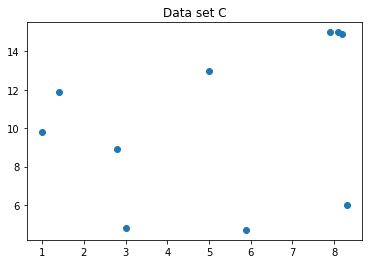

In [101]:
plt.title("Data set C")
plt.scatter(DsetC['x'],DsetC['y'])
plt.show()

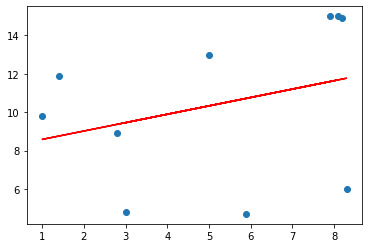

In [110]:
draw_lsr(DsetC['x'],DsetC['y'])

In [111]:
print("R2: ",R2(DsetC['x'],DsetC['y']))

2.9345452042106213
4.181971890016586
mean, std of var1: 5.159999999999999, 2.9345452042106213
mean, std of var2: 10.4, 4.181971890016586
numer: 2.7582698983058913 denom: 9
R2:  0.09392657817160978


9.4% of the variability in y is explained by 
the least-squares regression line


# Residual Analysis

if descernible pattern -> variables non-linear relation

In [112]:
weight = [1000.0, 897.1, 802.5, 719.8, 651.1, 583.4, 521.7, 468.3]#y
day = [i for i in range(len(weight))]#x

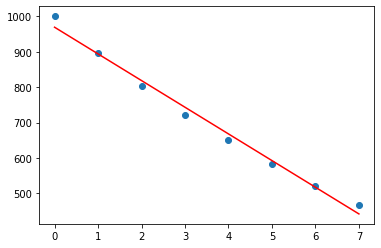

In [113]:
draw_lsr(day,weight)

In [115]:
coeff = linear_r(day,weight)

2.449489742783178
185.53719255563982
mean, std of var1: 3.5, 2.449489742783178
mean, std of var2: 705.4875, 185.53719255563982
numer: -6.958522916046996 denom: 7


In [116]:
coeff

-0.994074702292428

In [117]:
b_1, b_0 = Calculate_bs(day,weight)

2.449489742783178
185.53719255563982
mean, std of var1: 3.5, 2.449489742783178
mean, std of var2: 705.4875, 185.53719255563982
numer: -6.958522916046996 denom: 7
185.53719255563982
2.449489742783178





b_1: -75.29642857142859 b_0: 969.0250000000001


In [127]:
def Calculate_res(x,y):
  b_1,b_0 = Calculate_bs(x,y)
  predicted = [d*b_1+b_0 for d in x]
  residuals = []
  for y, y_hat in zip(y,predicted):
    residuals.append(y-y_hat)
  return residuals

In [120]:
predicted_weight = [d*b_1 + b_0 for d in day]
assert len(weight) == len(predicted_weight)
residuals = []
for y, y_hat in zip(weight, predicted_weight):
  residuals.append(y-y_hat)

In [128]:
res2 = Calculate_res(day,weight)

2.449489742783178
185.53719255563982
mean, std of var1: 3.5, 2.449489742783178
mean, std of var2: 705.4875, 185.53719255563982
numer: -6.958522916046996 denom: 7
185.53719255563982
2.449489742783178





b_1: -75.29642857142859 b_0: 969.0250000000001


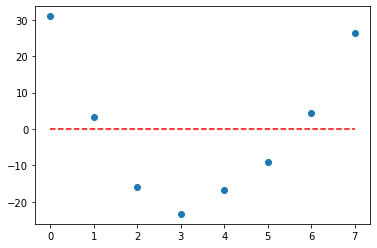

In [142]:
plt.scatter(day,res2)
plt.plot(day,[0 for i in range(len(res2))], linestyle='--',color='r')
plt.show()

Linear model not appropriate


## Constant error Variance
homoscedasticity

In [131]:
Depth#x

[35, 50, 75, 95, 120, 130, 145, 155, 160, 175, 185, 190]

In [132]:
Time#y

[5.88, 5.99, 6.74, 6.1, 7.47, 6.93, 6.42, 7.97, 7.92, 7.62, 6.89, 7.9]

In [133]:
residuals = Calculate_res(Depth,Time)

52.22873643015796
0.780774188439483
mean, std of var1: 126.25, 52.22873643015796
mean, std of var2: 6.985833333333335, 0.780774188439483
numer: 8.501036835398208 denom: 11
0.780774188439483
52.22873643015796





b_1: 0.011553009789627158 b_0: 5.527265847392906


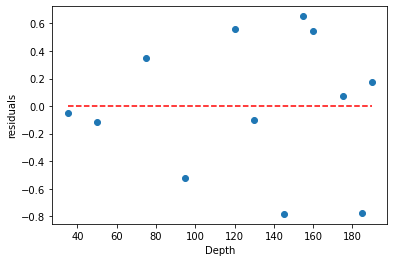

In [135]:
plt.scatter(Depth,residuals)
plt.xlabel("Depth")
plt.ylabel("residuals")
plt.plot(Depth,[0 for i in range(len(Depth))], linestyle='--',color='r')
plt.show()

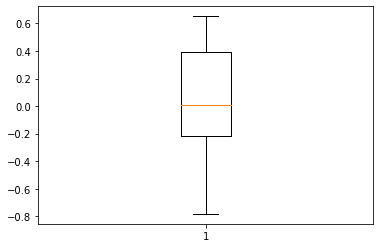

In [144]:
plt.boxplot(residuals)
plt.show()

## Influential observation

주로 x에 대한 이상치

In [145]:
Depth

[35, 50, 75, 95, 120, 130, 145, 155, 160, 175, 185, 190]

In [146]:
Time

[5.88, 5.99, 6.74, 6.1, 7.47, 6.93, 6.42, 7.97, 7.92, 7.62, 6.89, 7.9]

In [147]:
Depth.append(300)
Time.append(12.49)

In [152]:
z_depth = (300-np.mean(Depth))/sample_std(Depth)
print("z: ",z_depth)

69.44606835708132
z:  2.3094844557641716


In [153]:
z_time = (12.49-np.mean(Time))/sample_std(Time)
print("z: ",z_time)

1.6997816601868878
z:  2.989071684777802


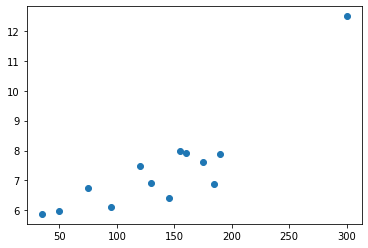

In [148]:
plt.scatter(Depth,Time)

In [154]:
b_1,b_0 = Calculate_bs(Depth,Time)

69.44606835708132
1.6997816601868878
mean, std of var1: 139.6153846153846, 69.44606835708132
mean, std of var2: 7.40923076923077, 1.6997816601868878
numer: 10.41522628627084 denom: 12
1.6997816601868878
69.44606835708132





b_1: 0.021243835980594133 b_0: 4.443264438093974


In [155]:
R2(Depth,Time)

69.44606835708132
1.6997816601868878
mean, std of var1: 139.6153846153846, 69.44606835708132
mean, std of var2: 7.40923076923077, 1.6997816601868878
numer: 10.41522628627084 denom: 12


0.7533120735710214

In [156]:
original_depth = Depth[:-1]
original_time = Time[:-1]

In [157]:
original_b1,original_b0 = Calculate_bs(original_depth, original_time)

52.22873643015796
0.780774188439483
mean, std of var1: 126.25, 52.22873643015796
mean, std of var2: 6.985833333333335, 0.780774188439483
numer: 8.501036835398208 denom: 11
0.780774188439483
52.22873643015796





b_1: 0.011553009789627158 b_0: 5.527265847392906


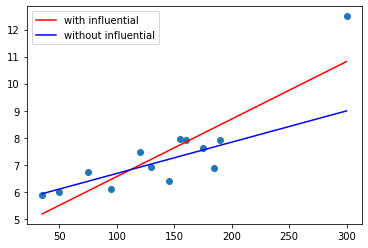

In [159]:
plt.scatter(Depth,Time)
x = [np.float64(n) for n in Depth]
y = [x*b_1+b_0 for x in Depth]
y2 = [x*original_b1+original_b0 for x in Depth]
plt.plot(x, y, 'r',label = "with influential")
plt.plot(x,y2,color='blue',label = "without influential")
plt.legend()
plt.show()

## Contingency Table and Marginal Distributions

In [210]:
Traditional = [36,52,57,46,46]
Online = [39,55,68,38,54]
Hybrid = [24,66,90,41,31]

In [211]:
df = pd.DataFrame({'Traditional':Traditional,
                   'Online':Online,
                   'Hybrid':Hybrid})

In [212]:
df.index = ['A','B','C','D','F']
df

,Traditional,Online,Hybrid
A,36,39,24
B,52,55,66
C,57,68,90
D,46,38,41
F,46,54,31


Compute the Marginal Distribution of a Variable

In [213]:
row_total = []
for i in range(len(Traditional)):
  row_total.append(np.sum(df.iloc[i]))

In [214]:
df['Total'] = row_total

In [215]:
df

,Traditional,Online,Hybrid,Total
A,36,39,24,99
B,52,55,66,173
C,57,68,90,215
D,46,38,41,125
F,46,54,31,131


In [216]:
col_total = {'Traditional':np.sum(Traditional),'Online':np.sum(Online),
             'Hybrid':np.sum(Hybrid),'Total':sum(df['Total'])}
df = df.append(col_total,ignore_index = True)

In [217]:
df

,Traditional,Online,Hybrid,Total
0,36,39,24,99
1,52,55,66,173
2,57,68,90,215
3,46,38,41,125
4,46,54,31,131
5,237,254,252,743


relative frequency marginal distribution for 
course grade and delivery method.

In [174]:
sum(col_total.values())

743

In [175]:
sum(df['Total'])

743

In [233]:
total = sum(df['Total'])
total

748

In [188]:
relative_df = original_df

In [189]:
relative_df['Relative'] = np.array(df['Total'])/sum(df['Total'])

In [190]:
col_total = {'Traditional':np.sum(Traditional)/sum(df['Total']),'Online':np.sum(Online)/sum(df['Total']),
             'Hybrid':np.sum(Hybrid)/sum(df['Total']),'Relative':1.0}

In [191]:
relative_df.append(col_total,ignore_index = True)

,Traditional,Online,Hybrid,Relative
0,36.000000,39.000000,24.000000,0.133244
1,52.000000,55.000000,66.000000,0.232840
2,57.000000,68.000000,90.000000,0.289367
3,46.000000,38.000000,41.000000,0.168237
4,46.000000,54.000000,31.000000,0.176312
5,0.318977,0.341857,0.339166,1.000000


Use the Conditional Distribution to Identify 
Association among Categorical Data

In [219]:
df.index = ['A','B','C','D','F','Total']
df

,Traditional,Online,Hybrid,Total
A,36,39,24,99
B,52,55,66,173
C,57,68,90,215
D,46,38,41,125
F,46,54,31,131
Total,237,254,252,743


In [235]:
con_df = original_df/total

In [237]:
total_trad = np.sum(Traditional)/sum(df['Total'])
total_online = np.sum(Online)/sum(df['Total']),
total_hybrid = np.sum(Hybrid)/sum(df['Total'])

con_df['Traditional'] = con_df['Traditional']/total_trad
con_df['Online'] = con_df['Online']/total_online
con_df['Hybrid'] = con_df['Hybrid']/total_hybrid

In [239]:
con_df.drop(columns='Relative')#p(A|traditional)

,Traditional,Online,Hybrid
0,0.151899,0.153543,0.095238
1,0.219409,0.216535,0.261905
2,0.240506,0.267717,0.357143
3,0.194093,0.149606,0.162698
4,0.194093,0.212598,0.123016


In [244]:
con_df.index = ['A','B','C','D','F']

In [240]:
np.sum(con_df['Traditional'][:3])

0.6118143459915613

In [241]:
np.sum(con_df['Online'][:3])

0.6377952755905512

In [242]:
np.sum(con_df['Hybrid'][:3])

0.7142857142857142

It appears that students in the hybrid course are more likely to 
pass (A, B, or C) than the other two methods.

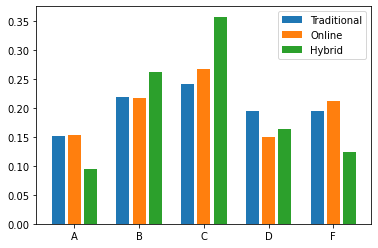

In [253]:
ind = np.arange(5)#number of grades (x classes)
width = 0.25
plt.bar(ind, con_df['Traditional'],label = "Traditional",width = 0.2)
plt.bar(ind+width, con_df['Online'],label = "Online",width = 0.2)
plt.bar(ind+2*width, con_df['Hybrid'],label = "Hybrid",width = 0.2)
plt.xticks(ind+width,con_df.index)
plt.legend()
plt.show()

In [254]:
men = [334,1360]
women = [318,104]
Boys = [29,35]
Girls = [27,18]

In [255]:
last_df = pd.DataFrame({'Men':men, 'Women':women, 'Boys':Boys, 'Girls':Girls})

In [256]:
last_df.index = ['Survived','Died']
last_df

,Men,Women,Boys,Girls
Survived,334,318,29,27
Died,1360,104,35,18


In [269]:
con_df = last_df

In [270]:
sum_total = sum(men)+sum(women)+sum(Boys)+sum(Girls)
sum_total

2225

In [271]:
con_df = con_df/sum_total#relative freq
con_df

,Men,Women,Boys,Girls
Survived,0.197166,0.753555,0.453125,0.6
Died,0.802834,0.246445,0.546875,0.4


In [273]:
total_men = np.sum(men)/sum_total
total_women = np.sum(women)/sum_total
total_boys = np.sum(Boys)/sum_total
total_girls = np.sum(Girls)/sum_total

total_men#p(men)

0.7613483146067416

In [ ]:
con_df['Men']= con_df['Men']/total_men
con_df['Women']= con_df['Women']/total_women
con_df['Girls']= con_df['Girls']/total_girls
con_df['Boys']= con_df['Boys']/total_boys

In [268]:
con_df#p(survived|men) = p(sur,men)/p(men)

,Men,Women,Boys,Girls
Survived,0.258970,3.973125,15.753174,29.666667
Died,1.054489,1.299387,19.012451,19.777778
